<h2>Отчет по Лабоработной работе №3</h2>
 
Параметры cache памяти (L3):
12-way associative cache, 3MB
line size 64B

Это соответствует числу set'ов в $2^{12}$


Не уверен, какие параметры компьютера интересуют, но пусть будут cледующие:

- процессор Intel i5-4258U; 
- память 8GB

**Грустное примечание** 

Мне было немного лениво качественно прописывать для класса NWaySet хранение данных в словарях, поскольку NWays = 12 - константа, и не такая уж и большая. Возможно из-за этого программа работает очень медленно.

In [15]:
logs = """n = 1023
timeSimple: 66979775
timeBlock: 6803495
timeSwapped: 66978816
n = 1024
timeSimple: 1074826304
timeBlock: 16436914
timeSwapped: 67174400
n = 1025
timeSimple: 67373250
timeBlock: 6830120
timeSwapped: 67372290
n = 1028
timeSimple: 67965192
timeBlock: 6869867
timeSwapped: 67964421
n = 1031
timeSimple: 68562918
timeBlock: 6976746
timeSwapped: 68561952
n = 1034
timeSimple: 69162709
timeBlock: 7017319
timeSwapped: 69161805
n = 1040
timeSimple: 70371600
timeBlock: 7098000
timeSwapped: 70371600
n = 1041
timeSimple: 70576677
timeBlock: 7180461
timeSwapped: 70575702
n = 1050
timeSimple: 72422175
timeBlock: 7305060
timeSwapped: 72421257
n = 1100
timeSimple: 83263950
timeBlock: 8395200
timeSwapped: 83263125"""

def parse_logs(): 
    results = list()
    for line in logs.split('\n'): 
        if 'n = ' in line:
            n = int(line.split('=')[1].strip())
            results.append((n, dict()))
        else:
            alg, misses = line.split(':')
            results[-1][1][alg[4:]] = float(misses.strip())
    return results

results = parse_logs()
results

[(1023, {'Block': 6803495.0, 'Simple': 66979775.0, 'Swapped': 66978816.0}),
 (1024, {'Block': 16436914.0, 'Simple': 1074826304.0, 'Swapped': 67174400.0}),
 (1025, {'Block': 6830120.0, 'Simple': 67373250.0, 'Swapped': 67372290.0}),
 (1028, {'Block': 6869867.0, 'Simple': 67965192.0, 'Swapped': 67964421.0}),
 (1031, {'Block': 6976746.0, 'Simple': 68562918.0, 'Swapped': 68561952.0}),
 (1034, {'Block': 7017319.0, 'Simple': 69162709.0, 'Swapped': 69161805.0}),
 (1040, {'Block': 7098000.0, 'Simple': 70371600.0, 'Swapped': 70371600.0}),
 (1041, {'Block': 7180461.0, 'Simple': 70576677.0, 'Swapped': 70575702.0}),
 (1050, {'Block': 7305060.0, 'Simple': 72422175.0, 'Swapped': 72421257.0}),
 (1100, {'Block': 8395200.0, 'Simple': 83263950.0, 'Swapped': 83263125.0})]

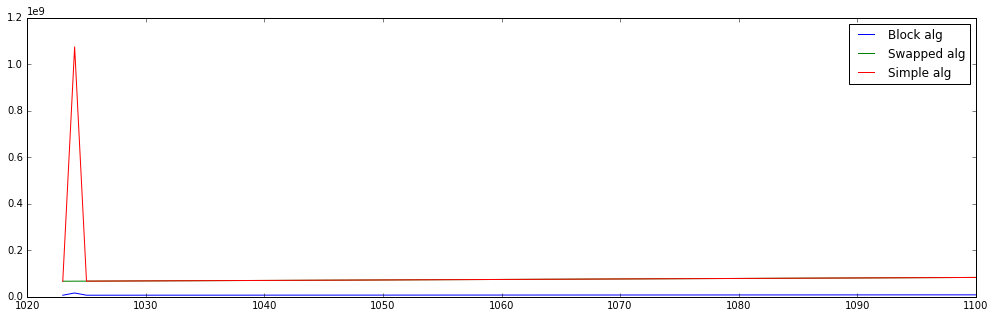

In [16]:
%matplotlib inline
from matplotlib import pyplot

def draw(results):
    algos = results[0][1].keys() 
        
    n_range = [result[0] for result in results]
    time_ranges = [[result[1][alg] for result in results] for alg in algos]

    ax = pyplot.figure(figsize=(17,5), dpi=100).add_subplot(111)  
    for time_range in time_ranges:
        ax.plot(n_range, time_range) 
    ax.legend(['{} alg'.format(alg) for alg in algos], loc='upper right')
    pyplot.show()
        

draw(results)